# Chap 12 : Recurrent Neural Network

## 1. Sequence Data
- We don't understand one word only
- We understand based on the previous words + this word. (time series)
- NN/CNN cannot do this
- RNN은 시간 개념이 포함되었다. 자연어 처리와 같이 이전 단어가 현재 단어에 영향을 미치기 때문이다.

<img src="https://cdn-images-1.medium.com/max/1600/1*DItCSHJ-NA2wy4lFfXv-_Q.png" alt="" title="" />

## 2. Vanilla RNN

- We can process a sequence of vectors x by applying a recurrent formula at every time step:

<img src="http://www.yuthon.com/images/RNN_concept.png" alt="" title="" />

- Notice: the same function and the same set of parameters are used at every time step.

- The state consists of a single "hidden" vector h:

\begin{equation*}
h_t = f_W(h_{t-1}, x_t)
\end{equation*}

\begin{equation*}
h_t = tanh((W_{hh} \text{＊} h_{t-1}) + (W_{xh} \text{＊} x_t))
\end{equation*}

\begin{equation*}
y_t = W_{hy}h_t
\end{equation*}


- hyperbolic tangent curve
<img src="https://cdn-images-1.medium.com/max/1600/1*f9erByySVjTjohfFdNkJYQ.jpeg" alt="" title="" />


## 3. Character level language model example

<img src="https://byungjun0689.github.io/src/0609/RNN/8.PNG" alt="" title="" />

- vocabulary를 one hot encoring 형태의 벡터로 표현하였다. (h, e, l, o)

- 초기 ht-1이 없는 경우 일반적으로 0을 사용한다.

- xt는 현재 상태의 입력에 대한 one hot encoding 값이다.

- Whh는 이전 hidden layer에서 학습한 weight이다.

- Wxh는 현재 상태의 학습시 결정된 weight 값이다. 

- tanh 함수를 거치면 아래와 같이 -1.0 ~ +1.0사이의 결과를 얻게된다.

- 같은 과정을 반복하며 이전의 값들에 영향을 받으며 학습이 진행된다.

<img src="http://karpathy.github.io/assets/rnn/charseq.jpeg" alt="" title="" />

- ht는 위에서 얻은 hidden layer의 state값이다.

- Why는 현재 hidden layer값에 따라 학습한 weight값이다.

- 최종적인 yt는 ht와 why의 곱이다.

- 학습을 위한 cost함수로 softmax를 사용한다.


## 4. RNN applications

<img src="http://i-systems.github.io/HSE545/machine%20learning%20all/16%20Deep%20learning/image_files/rnn_application.jpg" alt="" title="" />

- Language Modeling

- Speech Recognition 

- Machine Translation ( many to many)

- Conversation Modeling / Question Answering

- Image (one to many) / Video Captioning (many to many)

- Image / Music / Dance Generation


## 5. Traning RNNs is challenging

- Several advanced models
  - Long Short Term Memory (LSTM)
  - GRU by Cho et al. 2014
 

## 6. Lab1: RNN basics

### 6.1. Tensorflow에서 RNN 구현 방법

  - Step 1: cell을 만든다. (BasicLSTMCell, BasicGRUCell, BasicRNNCell 등) 이때 num_units 즉 hidden size를 정해야 한다.
  
  - Step 2: 입력 x와 cell을 기반으로 구동을 시켜야 하는데 이때 tf.nn.dynamic_rnn함수를 사용한다. 

  - 두가지 스텝으로 나눈 목적은 cell을 생성하는 형태를 쉽게 변경하기 위해서다.


### 6.2. Cell을 만들고 x 데이터를 입력하여 어떤 결과의 ht가 나오는지 살펴보는 예제

<img src="https://cloud.githubusercontent.com/assets/901975/23348727/cc981856-fce7-11e6-83ea-4b187473466b.png" alt="" title="" />

- 입력 x는 one hot encoding 형태로 준다. 이 입력의 형태에 따라 출력의 shape이 결정된다.

- 아래 소스코드에서 x는 [[h]]로 주어졌는데 이것 것은 h에 해당하는 one hot encoding 값인  [[[1,0,0,0]]] 로서 shape은 [1,1,4]가 된다.

- 세번째의 4는 one hot encoding의 dimension 값이다. 여기서는 4가 된다.

- 두번째의 1은 sequence_lengh로에서 one hot encoding된 문자를 몇개를 받을것인지 정한 값이다. RNN에서 입력을 series로 받을수 있는 장점이 있다고 했는데, sequence_length가 입력 데이터를 몇개 받을것인지를 의미한다.

- 첫번째 1은 batch_size로서 sequence_lengh의 문자열을 몇개씩 받을것인지 정한 값이다. 대량의 입력 데이터를 효율적으로 받기 위한것이다.

- 출력 ht는 hidden 사이즈로서 개발자가 알아서(?) 정한다. 여기서는 2가 된다.

- 출력 ht의 shape은 입력 shape의 bach_size, sequence_lengh, 그리고 출력의 hidden_size로 결정되는데 하기소스 에서는 [1,1,2]가 된다.

In [1]:
# http://www.wildml.com/2016/08/rnns-in-tensorflow-a-practical-guide-and-undocumented-features/
# http://learningtensorflow.com/index.html
# http://suriyadeepan.github.io/2016-12-31-practical-seq2seq/
# https://github.com/hunkim/DeepLearningZeroToAll

import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn
import pprint
pp = pprint.PrettyPrinter(indent=4)
sess = tf.InteractiveSession()

In [2]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

In [3]:
with tf.variable_scope('one_cell') as scope:
    # Step 1
    # One cell RNN input_dim (4) -> output_dim (2)
    hidden_size = 2
    cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)
    print(cell.output_size, cell.state_size)

    x_data = np.array([[h]], dtype=np.float32) # x_data = [[[1,0,0,0]]]
    pp.pprint(x_data)
    
    # Step2
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)

    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

2 2
array([[[1., 0., 0., 0.]]], dtype=float32)
array([[[0.3312397 , 0.64907897]]], dtype=float32)


- 결과적으로 hidden size를 2로 정했기 떄문에 2개의 ht를 출력 했다.
- 두 값은 초기 Weight 값이 랜덤하게 정해졌기 때문이다.
- 위 그림과 같이 outputs의 shape은 [1,1,2] 이다.

### 6.3. Unfolding to n sequences

<img src="https://cloud.githubusercontent.com/assets/901975/23383634/649efd0a-fd82-11e6-925d-8041242743b0.png" alt="" title="" />

- 하기 소스에서는 h, e, l, l, o를 입력으로 주었기 때문에 sequence_lenth는 5가 된다.

In [10]:
with tf.variable_scope('two_sequances') as scope:
    # One cell RNN input_dim (4) -> output_dim (2). sequence: 5
    hidden_size = 2
    cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)
    x_data = np.array([[h, e, l, l, o]], dtype=np.float32)
    print(x_data.shape)
    pp.pprint(x_data)
    outputs, states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

(1, 5, 4)
array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]], dtype=float32)
array([[[ 0.20307572,  0.45051005],
        [-0.582679  , -0.6799246 ],
        [-0.0949578 ,  0.3987969 ],
        [-0.4909559 , -0.15217248],
        [-0.35596716,  0.79350567]]], dtype=float32)


- 결과적으로 hidden size가 2, sequence_length가 5, batch_size가 1인 출력이 나왔다.

### 6.4. Batching input

<img src="https://i.ytimg.com/vi/B5GtZuUvujQ/maxresdefault.jpg" alt="" title="" />

- 하기 소스에서는 hello, eolll, lleel을 입력으로 주었기 때문에 sequence_length는 5, batch_size는 3이 된다.

In [4]:
with tf.variable_scope('3_batches') as scope:
    # One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
    # 3 batches 'hello', 'eolll', 'lleel'
    x_data = np.array([[h, e, l, l, o],
                       [e, o, l, l, l],
                       [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)
    
    hidden_size = 2
    cell = rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
    outputs, _states = tf.nn.dynamic_rnn(
        cell, x_data, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
array([[[-0.07422438,  0.04761285],
        [ 0.01398429, -0.00768795],
        [ 0.15866917,  0.002491  ],
        [ 0.22025451,  0.00481884],
        [ 0.04798251,  0.02212285]],

       [[ 0.05469137, -0.03794539],
        [-0.03193718,  0.00084602],
        [ 0.1291398 ,  0.01384986],
        [ 0.20831743,  0.01562873],
        [ 0.24378094,  0.01288211]],

       [[ 0.15182973,  0.01133412],
        [ 0.21781428,  0.01236716],
        [ 0.18148851, -0.04054077],
        [ 0.18034795, -0.06975642],
        [ 0.24427673, -0.07089303]]], dtype=float32)


- 결과적으로 hidden size가 2, sequence_length가 5, batch_size가 3인 출력이 나왔다.

- 하기 소스에서는 hello, eolll, lleel을 입력으로 주었기 때문에 sequence_length는 5, batch_size는 3이 된다. 위 소스와 다른점은 sequence_length를 직접 파라미터로 주었고 결과는 동일하다.

In [22]:
with tf.variable_scope('3_batches_dynamic_length') as scope:
    # One cell RNN input_dim (4) -> output_dim (5). sequence: 5, batch 3
    # 3 batches 'hello', 'eolll', 'lleel'
    x_data = np.array([[h, e, l, l, o],
                       [e, o, l, l, l],
                       [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)
    
    hidden_size = 2
    cell = rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
    outputs, _states = tf.nn.dynamic_rnn(
        cell, x_data, sequence_length=[5,3,4], dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
array([[[ 0.08456729,  0.17041391],
        [-0.01894175,  0.09074476],
        [-0.08715205,  0.09361196],
        [-0.13500401,  0.10542631],
        [-0.12139936,  0.01657603]],

       [[-0.07369197, -0.01015405],
        [-0.09755881, -0.02169333],
        [-0.17746384,  0.03082916],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[-0.08068489,  0.05343523],
        [-0.13173534,  0.08288844],
        [-0.16055581,  0.04604651],
        [-0.1652531 ,  0.01564497],
        [ 0.        ,  0.        ]]], dtype=float32)


### 6.5. Initial state
- initial_state를  zero_state로 초기화 하였다.

In [5]:
with tf.variable_scope('initial_state') as scope:
    batch_size = 3
    x_data = np.array([[h, e, l, l, o],
                      [e, o, l, l, l],
                      [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)
    
    # One cell RNN input_dim (4) -> output_dim (5). sequence: 5, batch: 3
    hidden_size=2
    cell = rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
    initial_state = cell.zero_state(batch_size, tf.float32)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data,
                                         initial_state=initial_state, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
array([[[-0.05778912, -0.10833783],
        [ 0.09644508, -0.08903784],
        [ 0.01725953, -0.12827596],
        [-0.0662363 , -0.17657696],
        [ 0.12660974, -0.08763576]],

       [[ 0.112213  ,  0.01687984],
        [ 0.28726444,  0.0737764 ],
        [ 0.09988581, -0.05714034],
        [-0.02238259, -0.13308102],
        [-0.08896179, -0.1797359 ]],

       [[-0.08288808, -0.08829874],
        [-0.12647307, -0.1458457 ],
        [ 0.07303302, -0.17805964],
        [ 0.15202868, -0.14663127],
        [ 0.07407042, -0.15284944]]], dtype=float32)


### 6.6. Create input data

In [3]:
# Create input data
batch_size=3
sequence_length=5
input_dim=3

x_data = np.arange(45, dtype=np.float32).reshape(batch_size, sequence_length, input_dim)
pp.pprint(x_data)  # batch, sequence_length, input_dim

array([[[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.],
        [12., 13., 14.]],

       [[15., 16., 17.],
        [18., 19., 20.],
        [21., 22., 23.],
        [24., 25., 26.],
        [27., 28., 29.]],

       [[30., 31., 32.],
        [33., 34., 35.],
        [36., 37., 38.],
        [39., 40., 41.],
        [42., 43., 44.]]], dtype=float32)


### 6.7. Generate data

In [4]:
with tf.variable_scope('generated_data') as scope:
    # One cell RNN input_dim (3) -> output_dim (5). sequence: 5, batch: 3
    cell = rnn.BasicLSTMCell(num_units=5, state_is_tuple=True)
    initial_state = cell.zero_state(batch_size, tf.float32)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, initial_state=initial_state, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

array([[[ 7.48110488e-02,  4.12624627e-02, -9.81451720e-02,
         -4.58508693e-02, -6.72385171e-02],
        [ 3.95697318e-02,  1.93976834e-02, -8.82038027e-02,
         -1.37005150e-01, -5.50371669e-02],
        [ 1.36544313e-02,  2.78955442e-03, -3.88649367e-02,
         -2.51669079e-01, -1.41604347e-02],
        [ 4.43557836e-03,  2.95496691e-04, -9.21832118e-03,
         -3.61898363e-01, -1.59202924e-03],
        [ 1.41868938e-03,  2.78856842e-05, -1.32527947e-03,
         -4.52703238e-01, -7.99781701e-05]],

       [[ 3.54791380e-04,  1.27511225e-06, -1.03235609e-04,
         -7.45713338e-02, -6.94698315e-07],
        [ 1.09441113e-04,  1.87836562e-07, -2.08458423e-05,
         -1.33192539e-01, -5.50214772e-08],
        [ 3.28911519e-05,  1.98798329e-08, -3.45821059e-06,
         -1.76927119e-01, -3.76000342e-09],
        [ 9.68641052e-06,  1.87661553e-09, -5.79109837e-07,
         -2.08437979e-01, -2.59325256e-10],
        [ 2.80797872e-06,  1.69934275e-10, -9.87668685e-08,
  

### 6.7. Multi RNN Cell

In [4]:
hidden_size = 2

with tf.variable_scope('MultiRNNCell') as scope:
# Make a lstm cell with hidden_size (each unit output vector size)
    def lstm_cell():
        cell = rnn.BasicLSTMCell(hidden_size, state_is_tuple=True)
        return cell

    multi_cells = rnn.MultiRNNCell([lstm_cell() for _ in range(3)],
        state_is_tuple=True)
    
    # rnn in/out
    outputs, _states = tf.nn.dynamic_rnn(multi_cells, x_data, dtype=tf.float32)
    print("dynamic rnn: ", outputs)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())  # batch size, unrolling (time), hidden_size

dynamic rnn:  Tensor("MultiRNNCell/rnn/transpose_1:0", shape=(3, 5, 2), dtype=float32)
array([[[-0.00027085, -0.00084227],
        [ 0.00534773,  0.00444331],
        [ 0.0189098 ,  0.02099136],
        [ 0.03821621,  0.04889377],
        [ 0.05934175,  0.08434415]],

       [[ 0.00857534,  0.00970436],
        [ 0.02859911,  0.03536183],
        [ 0.05668376,  0.07609322],
        [ 0.08596861,  0.12464718],
        [ 0.11093155,  0.17272854]],

       [[ 0.00989135,  0.01119583],
        [ 0.03240403,  0.04011082],
        [ 0.06242602,  0.08408495],
        [ 0.09204917,  0.13425173],
        [ 0.116112  ,  0.18219046]]], dtype=float32)


### 6.8. Dynamic RNN
- 이전 예제에서는 sequence가 길이가 정해져 있었다. 예를 들어 번역기의 경우 사용자에 따라 번역을 요청하는 문자열의 길이가 다 다를것이다. 이에따라 가변 시퀀스 데이터를 처리할수 있어야 한다.

- Tensorflow에서는 tf.nn.dynamic_rnn 함수의 파라미터중 sequence_lengh에서 문자열의 크기를 알려줄수 있다. 문자열은 결국 batch이므로 batch size를 아래와 같이 줄수 있다.

- 출력 결과를 보면 batch 1에서 1을 주었기 때문에 첫번째 element 5개만 값이 출력되고 나뭐지는 모두 0이 출력되는 것을 확인할수 있다.

- 만약 sequence_length를 정의하지 않았을 경우 내부 wight에 따라 모두 어떤 값들을 출력되게 된다. 

In [4]:
with tf.variable_scope('dynamic_rnn') as scope:
    cell = rnn.BasicLSTMCell(num_units=5, state_is_tuple=True)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32,
                                         sequence_length=[1, 3, 2])
    # lentgh 1 for batch 1, lentgh 2 for batch 2
    
    print("dynamic rnn: ", outputs)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())  # batch size, unrolling (time), hidden_size

dynamic rnn:  Tensor("dynamic_rnn/rnn/transpose_1:0", shape=(3, 5, 5), dtype=float32)
array([[[-2.2194876e-01, -3.5411473e-02, -7.6707162e-02,  1.9601391e-01,
         -1.7267908e-01],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00]],

       [[-5.1824975e-01, -7.1828973e-11, -7.1079111e-01,  7.1213329e-01,
         -9.6094620e-04],
        [-6.0398436e-01, -1.5767901e-11, -7.4659145e-01,  9.3127543e-01,
         -2.4893592e-04],
        [-6.5752828e-01, -2.5333351e-12, -7.5408649e-01,  9.7480178e-01,
         -6.4929780e-05],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+

### 6.9. Bi-directional dynamic RNN

In [4]:
with tf.variable_scope('bi-directional') as scope:
    # bi-directional rnn
    cell_fw = rnn.BasicLSTMCell(num_units=5, state_is_tuple=True)
    cell_bw = rnn.BasicLSTMCell(num_units=5, state_is_tuple=True)

    outputs, states = tf.nn.bidirectional_dynamic_rnn(cell_fw, cell_bw, x_data,
                                                      sequence_length=[2, 3, 1],
                                                      dtype=tf.float32)

    sess.run(tf.global_variables_initializer())
    pp.pprint(sess.run(outputs))
    pp.pprint(sess.run(states))

(   array([[[ 1.0000140e-01, -1.5170319e-01,  1.8074368e-01,  2.5124910e-01,
         -1.6122947e-02],
        [ 7.5866051e-02, -1.7318512e-01,  1.7943960e-01,  7.0978105e-01,
         -4.0421192e-02],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00]],

       [[ 1.6805212e-04, -2.7985610e-05,  4.1677775e-03,  7.5956744e-01,
         -1.5049798e-03],
        [ 2.5644591e-05, -5.3059134e-06,  1.3360588e-03,  9.6329087e-01,
         -3.8348786e-03],
        [ 4.6667906e-06, -6.4679745e-07,  4.5586433e-04,  9.9482572e-01,
         -4.3543214e-03],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00]],

  

### 6.10. Flattern based softmax

In [5]:
# flattern based softmax
hidden_size=3
sequence_length=5
batch_size=3
num_classes=5

pp.pprint(x_data) # hidden_size=3, sequence_length=4, batch_size=2
x_data = x_data.reshape(-1, hidden_size)
pp.pprint(x_data)

softmax_w = np.arange(15, dtype=np.float32).reshape(hidden_size, num_classes)
outputs = np.matmul(x_data, softmax_w)
outputs = outputs.reshape(-1, sequence_length, num_classes) # batch, seq, class
pp.pprint(outputs)

array([[[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.],
        [12., 13., 14.]],

       [[15., 16., 17.],
        [18., 19., 20.],
        [21., 22., 23.],
        [24., 25., 26.],
        [27., 28., 29.]],

       [[30., 31., 32.],
        [33., 34., 35.],
        [36., 37., 38.],
        [39., 40., 41.],
        [42., 43., 44.]]], dtype=float32)
array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.],
       [12., 13., 14.],
       [15., 16., 17.],
       [18., 19., 20.],
       [21., 22., 23.],
       [24., 25., 26.],
       [27., 28., 29.],
       [30., 31., 32.],
       [33., 34., 35.],
       [36., 37., 38.],
       [39., 40., 41.],
       [42., 43., 44.]], dtype=float32)
array([[[  25.,   28.,   31.,   34.,   37.],
        [  70.,   82.,   94.,  106.,  118.],
        [ 115.,  136.,  157.,  178.,  199.],
        [ 160.,  190.,  220.,  250.,  280.],
        [ 205.,  244.,  283.,  322.,  361.]],

 

### 6.11. Sequence loss example 1
- serial data를 입력으로 학습을 할때 RNN에서도 cost 함수가 필요한데 이때 sequence_loss 함수를 이용한다.
- 이 함수의 파라미터로는 logits에 예측값을, targets는 label 데이터 사용한다.
- prediction의 [0.2, 0.7]이면 1로, [0.6, 0.2]면 0으로, [0.2, 0.9]면 1로 예측했다는 의미이다.
- 이에 따라 cost는 약 0.59로 그렇게 좋은 결과는 아니라는 것을 알수 있다.

In [6]:
# [batch_size, sequence_length]
y_data = tf.constant([[1, 1, 1]])

# [batch_size, sequence_length, emb_dim ]
prediction = tf.constant([[[0.2, 0.7], [0.6, 0.2], [0.2, 0.9]]], dtype=tf.float32)

# [batch_size * sequence_length]
weights = tf.constant([[1, 1, 1]], dtype=tf.float32)

sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=prediction, targets=y_data, weights=weights)
sess.run(tf.global_variables_initializer())하기소스는
print("Loss: ", sequence_loss.eval())

Loss:  0.5967595


### 6.12. Sequence loss example 2
- 6.11.에 비해 예측이 좀더 정확한 데이터를 임의로 만들어 cost를 구해보면 점점더 좋아지는 결과를 확인할 수 있다.

In [13]:
# [batch_size, sequence_length]
y_data = tf.constant([[1, 1, 1]])

# [batch_size, sequence_length, emb_dim ]
prediction1 = tf.constant([[[0.3, 0.6], [0.3, 0.6], [0.3, 0.6]]], dtype=tf.float32)
prediction2 = tf.constant([[[0.2, 0.7], [0.2, 0.7], [0.2, 0.7]]], dtype=tf.float32)
prediction3 = tf.constant([[[0.2, 0.8], [0.2, 0.8], [0.2, 0.8]]], dtype=tf.float32)
prediction4 = tf.constant([[[0.1, 0.9], [0.1, 0.9], [0.1, 0.9]]], dtype=tf.float32)

# [batch_size * sequence_length]
weights = tf.constant([[1, 1, 1]], dtype=tf.float32)

sequence_loss1 = tf.contrib.seq2seq.sequence_loss(prediction1, y_data, weights)
sequence_loss2 = tf.contrib.seq2seq.sequence_loss(prediction2, y_data, weights)
sequence_loss3 = tf.contrib.seq2seq.sequence_loss(prediction3, y_data, weights)
sequence_loss4 = tf.contrib.seq2seq.sequence_loss(prediction4, y_data, weights)

sess.run(tf.global_variables_initializer())
print("Loss1: ", sequence_loss1.eval(),
      "Loss2: ", sequence_loss2.eval(),
      "Loss3: ", sequence_loss3.eval(),
      "Loss4: ", sequence_loss4.eval())

Loss1:  0.55435526 Loss2:  0.474077 Loss3:  0.437488 Loss4:  0.3711007


## 7. Lab2: hi hello
- 입력 'h'를 주었을때 'ihello'를 한글자씩 예측해 나가도록 학습시키는 예제이다.

<img src="https://t1.daumcdn.net/cfile/tistory/994FC13359B513A617" alt="" title="" />

### 7.1. Input and hidden layer
- input dimention 은 one hot size이므로 5가 된다.
- sequence length는 h i h e l l 을 줄것이므로 6이 된다.
- 출력이 되는 hidden size는 one hot으로 출력이 되야 하므로 input demention과 마찬가지로 5가 된다.
- batch size는 문자열 1개 (sequence length) 이므로 1이 된다.
- classifier 는 h i e l o 이렇게 5가지 문자가 되야 하므로 num_classes는 5가 된다.
- RNN 구성시 cell size는 출력값이므로 hidden size 였던 5가 된다.
- X는 placeholder로 [data type, batch_size, sequence_lenghth, input_dim]으로 구성 한다.
- Y는 placeholder로 label의 크기가 되는데 여기서는 sequence length가 된다.
- init state는 zero_state로 구성하는데 batch size를 주어야 한다.

### 7.2. FC layer and output layer
- cost를 구하기 위한 sequence_loss함수의 logits은 dynamic_rnn이 예측할 결과인 output을, targets은 Y값을 준다. 그리고 weights은 tf.ones함수를 사용하여 모두 1로 주어졌다.
- loss는 평균은 sequence_loss의 평균값을 가진다.
- cost minimize를 위해 AdamOptimizer를 사용한다.
- 학습 과정에서 prediction은 index를 출력하고, result_str은 결과를 charter로 변환하여 보여준다.
- 학습 진행되며 loss가 낮게 떨어지며 예측을 잘하고 있는것을 확인할 수 있다.

In [1]:
################################################################################
# lab12-2 : rnn, character level language model, hi hello example
# 
################################################################################
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# for reproducibility
tf.set_random_seed(777) 

# Dictionaray index to chracter
idx2char = ['h', 'i', 'e', 'l', 'o']

# Teach hello: hihell ->ihello
x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
x_one_hot = [[[1, 0, 0, 0, 0],  # h 0
              [0, 1, 0, 0, 0],  # i 1
              [1, 0, 0, 0, 0],  # h 0
              [0, 0, 1, 0, 0],  # e 2
              [0, 0, 0, 1, 0],  # l 3
              [0, 0, 0, 1, 0]]] # l 3
y_data = [[1, 0, 2, 3, 3, 4]]   # ihello

# Parameters
num_classes = 5 # h, i, e, l, o
input_dim = 5 # one-hot size
hidden_size = 5 # output from the LSTM, 5 to directly predict one-hot
batch_size = 1 # one sentence
sequence_length = 6 # ihello
learning_rate = 0.1

# Placeholders
X = tf.placeholder(tf.float32, [None, sequence_length, input_dim]) # X one-hot
Y = tf.placeholder(tf.int32, [None, sequence_length]) # Y label

cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell, X, initial_state=initial_state,
        dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
# fc_w = tf.get_variable("fc_w", [hidden_size, num_classes])
# fc_b = tf.get_variable("fc_b", [num_classes])
# outputs = tf.matmul(X_for_fc, fc_w) + fc_b
outputs = tf.contrib.layers.fully_connected(inputs=X_for_fc,
        num_outputs=num_classes, activation_fn=None)

# Reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y,
        weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_one_hot, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_one_hot})
        print("Step:", i, "\tLoss:", l, "\tPrediction:", result, "true Y:", y_data)

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print("\tPrediction str:", ''.join(result_str))

Step: 0 	Loss: 1.6078763 	Prediction: [[3 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str: llllll
Step: 1 	Loss: 1.5102623 	Prediction: [[3 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str: llllll
Step: 2 	Loss: 1.4327028 	Prediction: [[3 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str: llllll
Step: 3 	Loss: 1.3489527 	Prediction: [[3 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str: llllll
Step: 4 	Loss: 1.2551297 	Prediction: [[1 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str: illlll
Step: 5 	Loss: 1.140437 	Prediction: [[1 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str: illlll
Step: 6 	Loss: 1.0167552 	Prediction: [[1 3 2 3 3 4]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str: ilello
Step: 7 	Loss: 0.8969265 	Prediction: [[1 3 2 3 3 4]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str: ilello
Step: 8 	Loss: 0.76952547 	Prediction: [[1 0 2 3 3 4]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str: ihello
Step: 9 	Loss: 0.655007 	Prediction: 

## 8. Lab3: Long sequences

### 8.1. Input layer and hidden layer
- sample은 string으로 첫자리는 빈자리 이다.
- idx2char는 sample 데이터의 유일한 문자를 리스트로 만들어 반환해준다.
- char2idx는 idex2char의 문자를 dictionary로 만들어 반환해 준다. dictionary의 key는 문자가 되고 value는 index가 저장 된다.
- dic_size는 char2idx 사이즈와 같고 one hot size와 깉다.
- rnn_hidden_size는 RNN의 출력사이즈로서 one hot size와 같다.
- num_classes는 char2idx와 같다.
- batch_size는 한개의 문자열 이므로 1이 된다.
- sequen_length는 sample 전체 길에서 1을 뺀만큼이 된다. x_data의 길이와 같기 떄문이다.
- sample_idx는 sample에 저장된 string을 index로 저장한다.
- x_data는 sample_idx의 처음부터 마지막 이전까지의 데이터가 된다.
- y_data는 sample_idx의 두번째부터 마지막 자리까지의 데이터가 된다.
- x_data는 one_hot 함수를 이용하여 x_ont_hot 변수가 생성 된다. shape에 주의해야 한다.
- cell을 만들고, zero_state로 초기화 하여 dynamic_rnn을 이용하여 outputs을 생성 한다.

### 8.2. FC layer 및 output layer
- weights은 tf.ones로 모두 1로 한다.
- sequence_loss는 sequence_loss 함수를 사용하고 평균을 내어 loss를 산출한다.
- optimzer는 AdamOptimizer를 사용한다.

In [1]:
################################################################################
# lab12-3 : rnn, character level language model, character sequence
# 
################################################################################
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# for reproducibility
tf.set_random_seed(777) 

sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex

# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) e.g. hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) e.g. hello: ello

X = tf.placeholder(tf.int32, [None, sequence_length])  # X data
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

x_one_hot = tf.one_hot(X, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, x_one_hot, initial_state=initial_state, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes,
        activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y,
        weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]

        print(i, "loss:", l, "Prediction:", ''.join(result_str))

0 loss: 2.276697 Prediction: uyyyuuuuuuuuuuu
1 loss: 2.0970514 Prediction: oy youu      ou
2 loss: 1.9005873 Prediction: yy you    t  ou
3 loss: 1.6513932 Prediction: yy you   tt oou
4 loss: 1.3725078 Prediction: yy yuu watt you
5 loss: 1.1091274 Prediction: yy you want you
6 loss: 0.88443244 Prediction: yy you want you
7 loss: 0.68676245 Prediction: yf you want you
8 loss: 0.5162858 Prediction: if you want you
9 loss: 0.38270456 Prediction: if you want you
10 loss: 0.28334925 Prediction: if you want you
11 loss: 0.20955688 Prediction: if you want you
12 loss: 0.15383844 Prediction: if you want you
13 loss: 0.110947646 Prediction: if you want you
14 loss: 0.07805044 Prediction: if you want you
15 loss: 0.05388548 Prediction: if you want you
16 loss: 0.03705665 Prediction: if you want you
17 loss: 0.025750833 Prediction: if you want you
18 loss: 0.018248836 Prediction: if you want you
19 loss: 0.013245512 Prediction: if you want you
20 loss: 0.009865459 Prediction: if you want you
21 lo

## 9. Lab4: Long sequences with softmax layer

<img src="https://t1.daumcdn.net/cfile/tistory/9960873359B7E0E11E" alt="" title="" />

- RNN에서도 CNN에서 사용했던 Softmax layer를 사용할수 있다.
- RNN의 CELL은 펼치기 전에 한개의 CELL이므로 reshape을 통해 x_for_softmax를 만들어 softmax 함수로로 처리할수 있다. reshape의 입력은 RNN의 출력이고 크기는 hidden_size가 되어야 한다.
- softmax_w 입력의 크기는 hidden_size가 되고, 출력의 크기는 num_classes가 된다.
- softmax_b 출력의 크기는 num_classes가 된다.
- softmax의 출력은 FC layer의 입력이 되어야 하므로 다시 reshape을 통해 outputs를 만들게 된다. reshape의 입력은 softmax의 출력이고, [batch_size, seq_length, num_classes]의 shape이 되어야 한다. 이 shape은 Softmax layer의 입력이었던 RNN의 출력 크기와 동일하다.
- sequnce_loss에서 logits에 outputs을 주어야 한다. 이전 lab4에서는 RNN의 출력을 직접 logits에 주었으나 이것은 activation을 거친 결과이기 때문에 잘못된것이다. softmax layer 출력과 같이 activation을 거치지 않은 결과를 logits으로 주어야 한다. 그래야 학습시 좋은 성능을 낼수 있다.
- 이외 부분은 lab3과 동일하다.

In [1]:
################################################################################
# lab12-4 : rnn, character level language model, character sequence
#           softmax only
################################################################################
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# for reproducibility
tf.set_random_seed(777) 

sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex

# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
rnn_hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello

X = tf.placeholder(tf.int32, [None, sequence_length])  # X data
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

# flatten the data (ignore batches for now). No effect if the batch size is 1
X_one_hot = tf.one_hot(X, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0
X_for_softmax = tf.reshape(X_one_hot, [-1, rnn_hidden_size])

# softmax layer (rnn_hidden_size -> num_classes)
softmax_w = tf.get_variable("softmax_w", [rnn_hidden_size, num_classes])
softmax_b = tf.get_variable("softmax_b", [num_classes])
outputs = tf.matmul(X_for_softmax, softmax_w) + softmax_b

# expend the data (revive the batches)
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])
weights = tf.ones([batch_size, sequence_length])

# Compute sequence cost/loss
sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)  # mean all sequence loss
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(3001):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
               
        if i % 500 == 0:
                print(i, "loss:", l, "Prediction:", ''.join(result_str))

0 loss: 2.2742977 Prediction: ow oowioa oyoow
500 loss: 0.2786146 Prediction: yf you yant you
1000 loss: 0.27772188 Prediction: yf you yant you
1500 loss: 0.27749297 Prediction: yf you yant you
2000 loss: 0.27739808 Prediction: yf you yant you
2500 loss: 0.27734923 Prediction: yf you yant you
3000 loss: 0.27732077 Prediction: yf you yant you


## 10. Lab5: Long character sequence with stacked RNN
- Sentence 를 장문으로 할때 다음 문자를 예측하는 예제이다.
- Sentence 를 seqeunce_length 만큼 잘라서 traning data set 이 될 dataX, dataY를 만든다. 1바이트씩 window를 shift시키면서 만든다.
- batch_size는 dataX 만큼이 될것이며 169가 된다.
- RNN을 깊게 학습시킬수 있도록 MultiRNNCell 함수를 사용하였다. 이를 적용하지 않을 경우 학습이잘 일어나지 않는다.
- 나뭐지 과정은 lab3와 같다.

In [1]:
################################################################################
# lab12-5 : rnn, character level language model, long character sequence
# 
################################################################################
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.contrib import rnn

# for reproducibility
tf.set_random_seed(777) 

sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
#    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])

# One-hot encoding
X_one_hot = tf.one_hot(X, num_classes)
print(X_one_hot)  # check out the shape


# Make a lstm cell with hidden_size (each unit output vector size)
def lstm_cell():
    cell = rnn.BasicLSTMCell(hidden_size, state_is_tuple=True)
    return cell

multi_cells = rnn.MultiRNNCell([lstm_cell() for _ in range(2)],
        state_is_tuple=True)

# outputs: unfolding size x hidden size, state = hidden size
outputs, _states = tf.nn.dynamic_rnn(multi_cells, X_one_hot, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes,
        activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

# All weights are 1 (equal weights)
weights = tf.ones([batch_size, sequence_length])

sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
mean_loss = tf.reduce_mean(sequence_loss)
train_op = tf.train.AdamOptimizer(
        learning_rate=learning_rate).minimize(mean_loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(500):
    _, l, results = sess.run(
        [train_op, mean_loss, outputs], feed_dict={X: dataX, Y: dataY})
    for j, result in enumerate(results):
        index = np.argmax(result, axis=1)
#        print(i, j, ''.join([char_set[t] for t in index]), l)
print("Step i:", i, "j:", j, "char_set:", ''.join([char_set[t] for t in index]), "Loss:", l)

# Let's print the last char of each result to check it works
print("---------- Result -------")
results = sess.run(outputs, feed_dict={X: dataX})
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:  # print all for the first result to make a sentence
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')

Tensor("one_hot:0", shape=(?, 10, 25), dtype=float32)
Step i: 499 j: 169 char_set:   the sea. Loss: 0.22903594
---------- Result -------
p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

## 12. Lab6: RNN with time seriesdata (stock prediction)

<img src="https://i.ytimg.com/vi/odMGK7pwTqY/maxresdefault.jpg" alt="" title="" />

- 주식의 가격 데이터를 가지고 있고, 7일 단위로 주식값을 읽고 학습하여, 8일차의 Close 가격을 예측하는 예제이다. 이런 형태의 예측 모델을 many to model 이다.
- 입력의 dimension 은 Open, High, Low, Volume, Close가 되므로 5가 된다.
- sequence length는 7일 단위씩 읽어올 것이므로 7이 된다.
- output dimension 은 8일차의 Close값을 예측 하므로 1이 된다.
- 파일에서 데이터를 읽어와 시간을 역순으로 데이터를 정리한다.
- 읽은 데이터는 MinMaxScaler를 통해 normalize 한다.
- x값은 7일간의 데이터 전체를 가진다
- y값은 8일차의 데이터에서 close 값만 label로 사용한다.
- training set은 dataY의 70%, test set은 dataY의 30%를 사용한다.
- layer는 Input - RNN - FC - Output 의 형태가 된다.
- rnn layer 설계시 cell의 hideen_dim은 10개로 정했다.
- rnn 출력 10개중 마지막 1개만 FC layer의 입력으로 사용한다. 이에따라 output_dim도 1이 된다. 그리고 activation function은 사용하지 않는다. fully_connected의 파라미터로 입력해주게되면 여기서 Y_fred 즉 예측값을 얻게된된다.
- cost 함수는 예측값이 1개의 값이므로 간단히 tf.seuare(Y_pred - Y)를 사용하고 모두 더하게 된다. 예측값이 여러개 였을 경우 평균을 내었으므로 주의 한다!
- optimizer는 AdamOptimizer를 사용한다.
- 학습이 완료되면 Y_pred 예측값과 textX라는 테스트 데이터를 주어 예측한 Y값을 testPredict에 담는다. 이값과 testY값을 비교하기 위해 그래프로 출력해보면 비슷하게 예측하고 있다는것을 알수 있다.

[step: 0] loss: 120.23834228515625
[step: 100] loss: 0.8781153559684753
[step: 200] loss: 0.7470797300338745
[step: 300] loss: 0.6202673316001892
[step: 400] loss: 0.5380198359489441
[step: 500] loss: 0.48963862657546997
RMSE: 0.025228282436728477


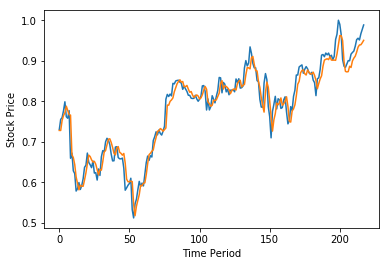

In [1]:
################################################################################
# lab12-6 : rnn, stock prediction
# 
################################################################################
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib
import os

tf.set_random_seed(777)  # reproducibility

if "DISPLAY" not in os.environ:
    # remove Travis CI Error
    matplotlib.use('Agg')

import matplotlib.pyplot as plt


def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


# train Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 501

# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
#    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        if i % 100 == 0:
            print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()

- 소스 최상단에 "%matplotlib inline" 을 추가하면 jyputer notebook에서 출력을 볼수있다.